# HW3 Problem 3

The goal of domain adaptation is to transfer the knowledge of a model to a different but related data distribution. The model is trained on a source dataset and applied to a target dataset (usually unlabeled). For Problem 3, the model will be trained on regular MNIST images, but we want to get good performance on MNIST with random color (without any labels).


**Problem Statement** Given a labelled source domain (MNIST) and an unlabelled target domain (MNIST-M). We would like to train a classifier or a predictor which would give accurate predictions on the target domain. 

**Assumptions** Probability distribution of source domain is not equal to the probability distribution of target domain. The conditional probability distribution of the labels given an instance from the source domain is equal to the conditional probability distribution of the labels given an instance from the target domain. Source dataset is labelled. Target dataset is unlabelled.

**Approach** Here, we adopt the DABP method mentioned in the paper “Unsupervised Domain Adaptation by Backpropagation”.

* Feature Extractor (green): This is a neural network that will learn to perform the transformation on the source and target distribution. 
* Label Classifier (blue): This is a neural network that will learn to perform the classification on the transformed source distribution. Since, the source domain is labelled. 
* Domain Classifier (red): This is a neural network that will predict whether the output of the Feature Extractor is from the source distribution or the target distribution.



By using the above three components, the Feature Extractor will learn to produce discriminative and domain-invariant features. 

Follow the instructions in `HW3_P3.ipynb` to download the pre-processed MNIST and MNIST-M dataset and visualize some examples. 


The details of the implementation are also introduced in `HW3_P3.ipynb`. Please read it carefully before working on this problem. The implementation of the DABP includes the following components (please follow the provided sample codes): 
* MNIST and MNITS-M DataLoader
* Feature Extractor 
* Label and Domain Classifier
* Gradient Reversal Layer


In [1]:
# download the codes from Git
!git clone https://github.com/aedenj/Pytorch_DABP.git

Cloning into 'Pytorch_DABP'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 40 (delta 15), reused 26 (delta 8), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [24]:
%ls data/pytorch/MNIST-M/processed/mnist_m_train.pt

ls: cannot access 'mnist_m_train.pt': No such file or directory
data/pytorch/MNIST-M/processed/:
mnist_m_test.pt  mnist_m_train.pt


Visualize Images

In [2]:
from mlxtend.data import loadlocal_mnist
import random

mnist, mnist_labels = loadlocal_mnist(
  images_path='./data/pytorch/MNIST/MNIST/raw/train-images-idx3-ubyte', 
  labels_path='./data/pytorch/MNIST/MNIST/raw/train-labels-idx1-ubyte')

In [9]:
mnist = mnist.reshape(60000, 28, 28)

In [12]:
import matplotlib.pyplot as plt

def show(image, title):
    index = 1 
    plt.figure(figsize=(10,5))

    for x in zip(image, title):        
        image = x[0]        
        title = x[1]
        plt.subplot(2, 5, index)        
        plt.imshow(image, cmap=plt.cm.gray)  
        plt.title(x[1], fontsize = 9)
        index += 1

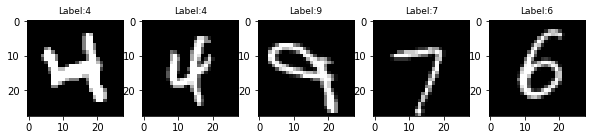

In [13]:
image = []
title = []
for i in range(0, 5):
    r = random.randint(1, len(mnist))
    image.append(mnist[r])
    title.append('Label:' + str(mnist_labels[r]))       
    
show(image, title)

Train the DABP model by running `main.py` and answer the following questions. 


* Q1: Perform **3** experiments on training and report your source and target accuracy in the tables below. (Your result is the average of the Target Accs. based on 3 experiments)

|                | Test1 | Test2 | Test3 |
|----------------|:-----:|:-----:|:-----:|
| Source Acc (%) | 88.71%  | 97.64% | 89.04% |
| Target Acc (%) | 50.54%  | 63.73% | 50.85% |

|          | Paper | Your Result |
|----------|:-----:|:-----------:|
| DABP (%) | 52.25 |    55.04%  |

In [4]:
import sys
sys.path.append('./Pytorch_DABP')

Experiment 1

In [4]:
!python Pytorch_DABP/main.py

9913344it [00:00, 43992617.45it/s]                 
Extracting data/pytorch/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data/pytorch/MNIST/MNIST/raw

29696it [00:00, 13031392.72it/s]
Extracting data/pytorch/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data/pytorch/MNIST/MNIST/raw

1649664it [00:00, 12085841.00it/s]               
Extracting data/pytorch/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data/pytorch/MNIST/MNIST/raw

5120it [00:00, 32196156.64it/s]
Extracting data/pytorch/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/pytorch/MNIST/MNIST/raw

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the re

Experiment 2

In [5]:
!python Pytorch_DABP/main.py

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
Running GPU : 0
Source-only training
Epoch : 0
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, ke

Experiment 3

In [6]:
!python Pytorch_DABP/main.py

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
Running GPU : 0
Source-only training
Epoch : 0
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, ke

* Q2: Write your own codes to visualize the feature space by using the TSNE(perplexity=30, n_components=2, init=’pca’, n_iter=3000). Plot the feature distributions for both (1) original MNIST and MNIST-M inputs and (2) after DABP using source only. (**You will find useful functions inside the `utils`function.** )

### Display MNIST

In [5]:
from sklearn.manifold import TSNE

mnist, mnist_labels = loadlocal_mnist(
  images_path='./data/pytorch/MNIST/MNIST/raw/train-images-idx3-ubyte', 
  labels_path='./data/pytorch/MNIST/MNIST/raw/train-labels-idx1-ubyte')

In [11]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000).fit_transform(mnist[:3000])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


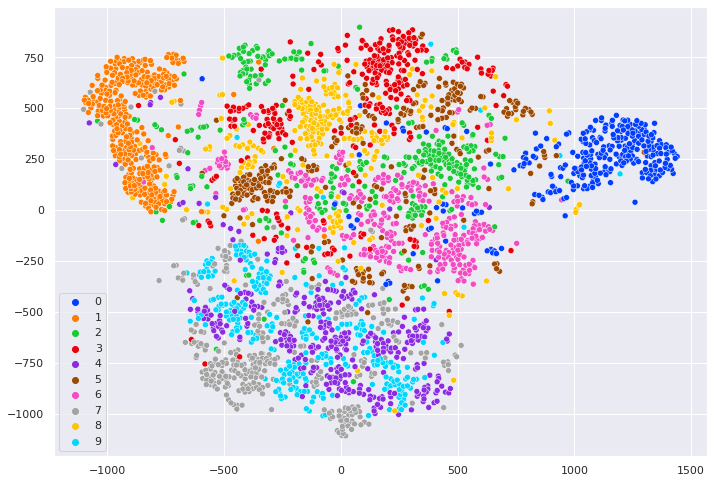

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

sns.scatterplot(tsne[:,0], tsne[:,1], hue=mnist_labels[:3000], legend='full', palette=palette)

### Display MNIST-M

In [29]:
 import torch 

 mnistm_data,  mnistm_labels = torch.load('./data/pytorch/MNIST-M/processed/mnist_m_train.pt')                

In [28]:
mnistm_tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000).fit_transform(mnist[:3000])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


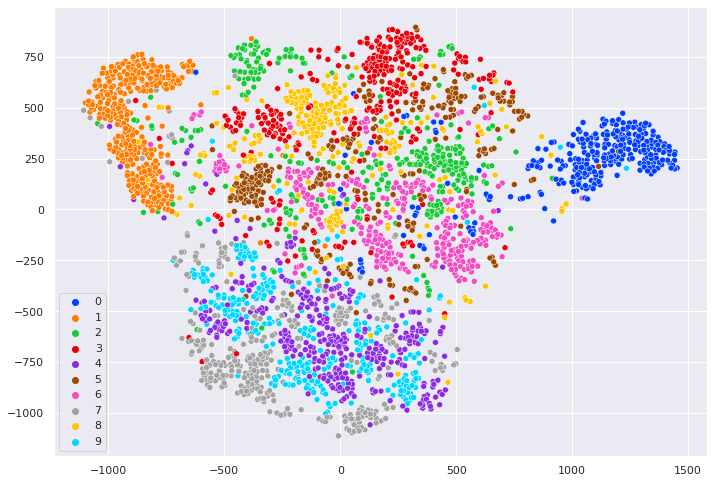

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

sns.scatterplot(mnistm_tsne[:,0], mnistm_tsne[:,1], hue=mnistm_labels[:3000], legend='full', palette=palette)

### Display DABP using source only

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extract features to draw T-SNE plot...
Draw plot ...
saved_plot/input_mnist_n_mnistM.png is saved


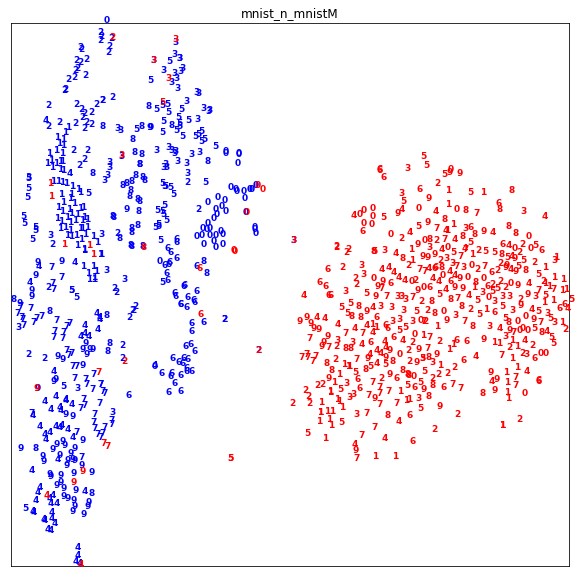

In [7]:
import utils

utils.visualize_input()